In [48]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from PFClasses import SimpleModel, ParticleFilter, Kalman, Event, StochasticModelTauLeaping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simple 1D example

In [8]:
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]])

model1 = SimpleModel(x_0, F, H, Q, R)
time = 50

In [17]:
pf1 = ParticleFilter(model1, N=1000, resampling_algo='simple_resample', x_0=model1.states[0])

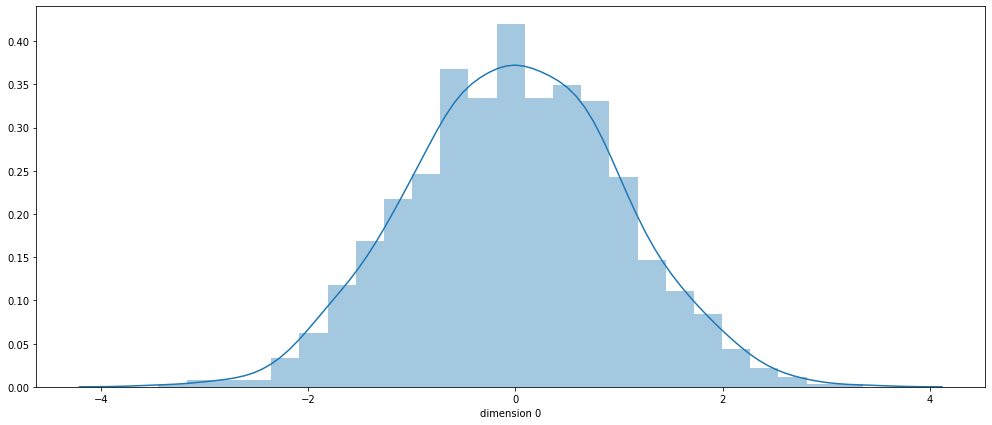

In [18]:
pf1.plot_particles()

Running PF with 1000 particles: ..RR.R..R...R..R...R.R.R...R.R...R.R.R..RR.R...R. end
Marginal likelihood:  -62.693


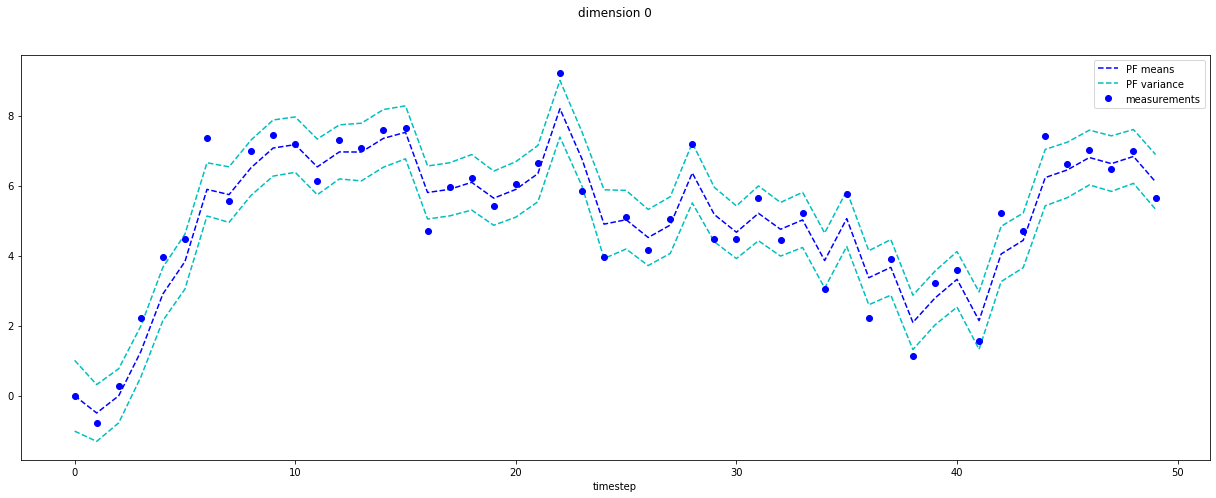

In [19]:
pf_means, pf_variances, pf_likelihood = pf1.run(time)

Loglikelihood:  -139.28171194173802


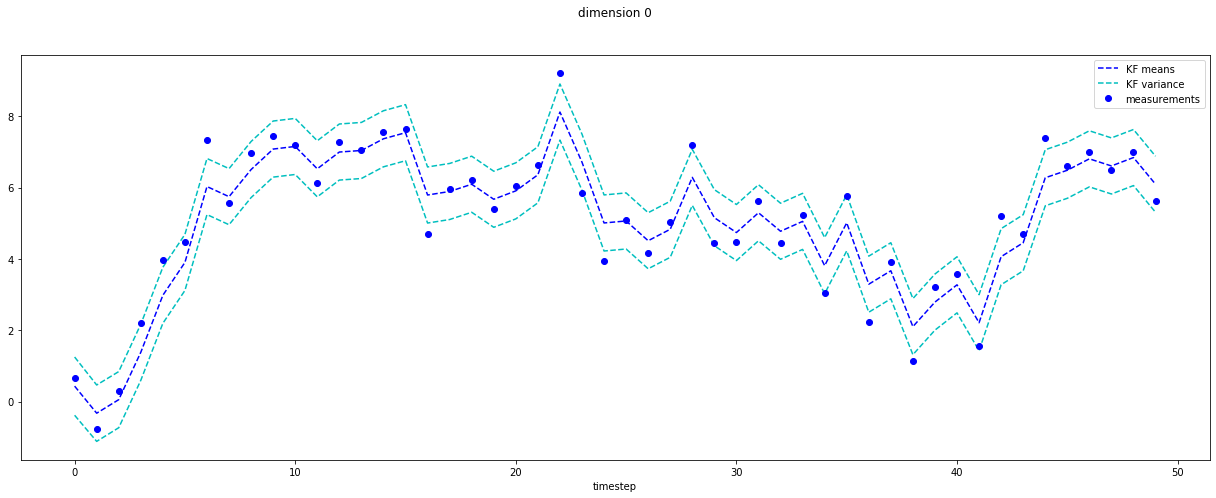

In [20]:
kf1 = Kalman(model1, print_results=True)
kf_means, kf_variances = kf1.run(time)

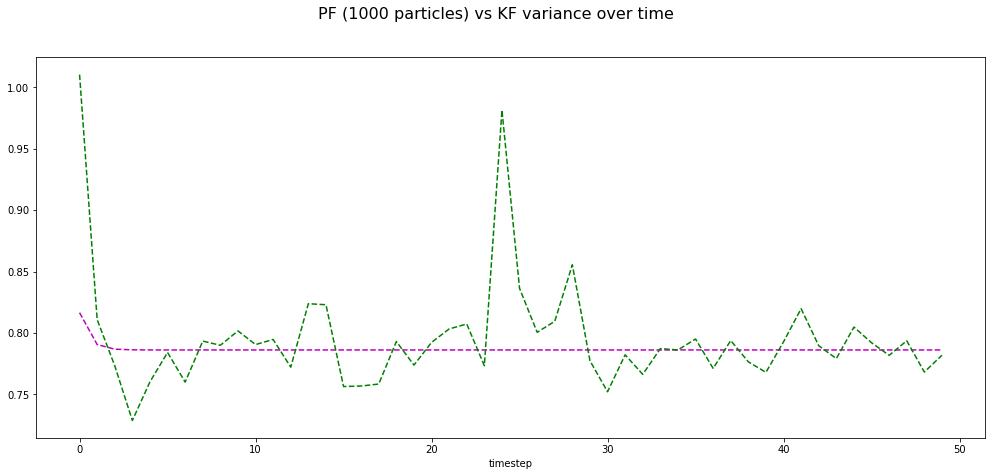

In [21]:
times = range(time)
fig = plt.figure()
fig.suptitle('PF (1000 particles) vs KF variance over time', fontsize=16)
ax = fig.add_subplot(111)
ax.plot(times, kf_variances, 'm--', label='KF variances')
ax.plot(times, pf_variances, 'g--', label='PF variances')
ax.set_xlabel("timestep")
plt.show()

In [22]:
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500]#, 600, 800, 1000]#, 1100, 2000, 2200]
time = 50

from multiprocessing import Pool
def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo='simple_resample', x_0=model1.states[0], print_results=False)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.var(pf_variances[int(.2 * time):])

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)

Running PF with 10 particles: ..R..R....R....R.....R..R..RR....R...R..R..R...R. end
Running PF with 20 particles: ..R.RR.R..R...RR...R.RRR...R..R..R..R..R..RR...R. end
Running PF with 30 particles: ..RR.R.R..R...RR..R..R.R...R.R..R.RR.R..RR.R....R end
Running PF with 70 particles: ..R.RR..R...R..R...R.RRR...R..R..R.R.R..RR.R....R end
Running PF with 100 particles: ..R.RR...R..R..R...R.R.R...R..R..R.R.R..RR.R...R. end
Running PF with 200 particles: ..RR.R..R...R..R...R.R.R...R.R...R.R.R..RR.R...R. end
Running PF with 300 particles: ..RR.R..R...R..R...R.R.R...R.R...R.R.R..RR.R...R. end
Running PF with 400 particles: ..R.RR..R...R..R...R.R.R...R.R...R.R.R..RR.R...R. end
Running PF with 500 particles: ..RR.R..R...R..R...R.R.R...R..R..R.R.R..RR.R...R. end


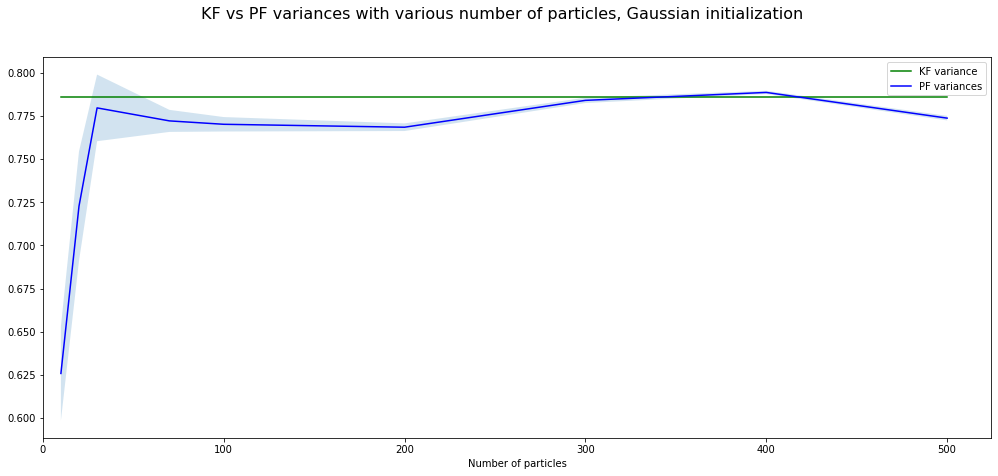

In [23]:
kf1x = Kalman(model1, print_results=False)
kf_means, kf_vars = kf1x.run(time)
kf_var = np.mean(kf_variances[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

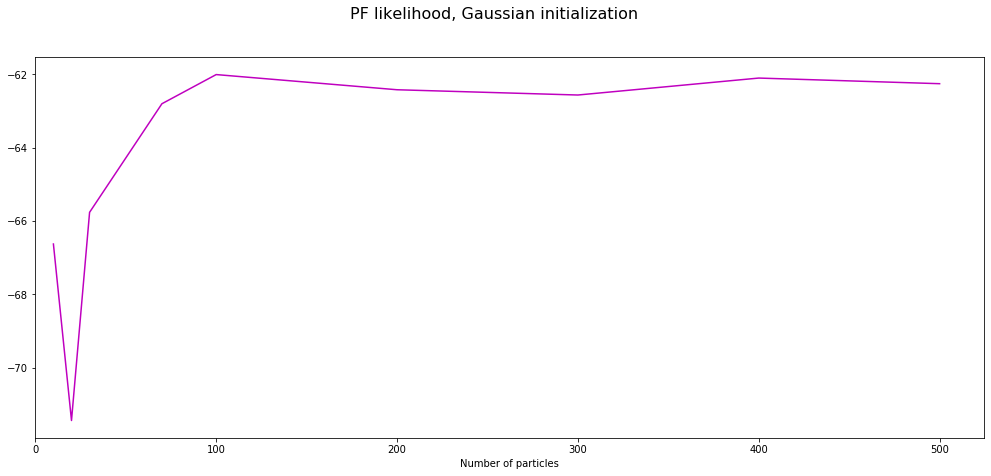

In [28]:
times = range(len(particles_to_test))
pf_likelihoods = res[:, 3]
fig = plt.figure()
fig.suptitle("PF likelihood, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)
ax.plot(particles_to_test, pf_likelihoods, 'm')
ax.set_xlabel("Number of particles")
ax.set_xlim(left=0)
plt.show()

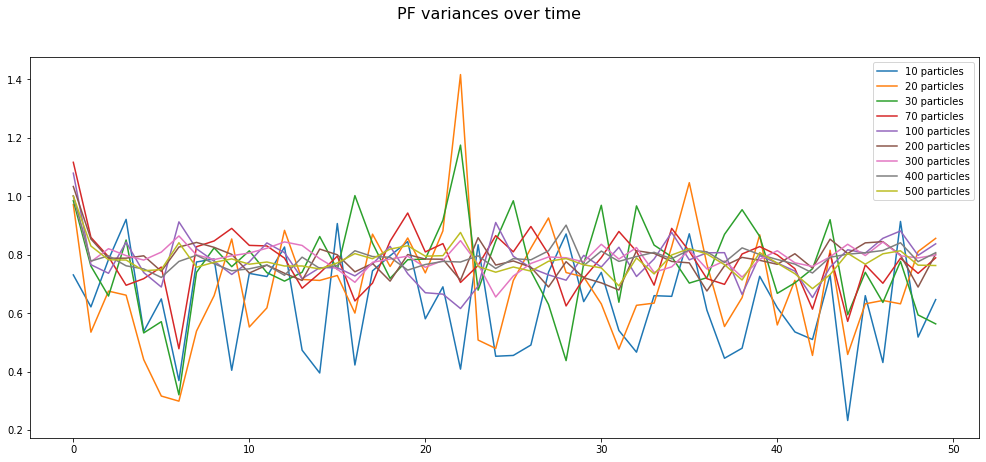

In [29]:
variances = res[:, 0]
times = range(time)
fig = plt.figure()
fig.suptitle("PF variances over time (Gaussian initialization)", fontsize=16)
ax = fig.add_subplot(111)
for nr in range(len(particles_to_test)):
    ax.plot(times, variances[nr], label=str(particles_to_test[nr])+" particles")
ax.legend()
plt.show()

In [30]:
particles_to_test = [10, 15, 20, 25, 30, 35, 45, 50, 70, 100, 200, 300, 400, 500]#, 600, 800, 1000]#, 1100, 2000, 2200]
time = 50

from multiprocessing import Pool
def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo='simple_resample', ranges=[[-100, 100]], print_results=False)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.var(pf_variances[int(.2 * time):])

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)

Running PF with 10 particles: RRRRR..R......RR....RRR..R..R..R...R.R..RR..R...R end
Running PF with 15 particles: R..R.R.R..R...RR....R..R...R..R..RR..R...R.R....R end
Running PF with 20 particles: R..R.R...R....R.R.R..R.R.R.R..R..R.R..R...RR...R. end
Running PF with 25 particles: R..R.R...R...R.R...R.R.R...R..R...R..R..R..R...R. end
Running PF with 30 particles: R..R.R....R...RR..R..R.R...R.R..RR.R.R.R..RR...R. end
Running PF with 35 particles: R..R.R...R...R.R....RR.R.R.R.R...R.R.R..RR.R....R end
Running PF with 45 particles: R..R.R..R...R..R...R.R.R...R.R...R.R.R..RR.R...R. end
Running PF with 50 particles: R..R.R...R..R..R...R.R.R..R.R...R.RR.R...R.R...R. end
Running PF with 70 particles: R.R.RR..R...R..R...R.RRR...R.R...R.R.R.R.R.R...R. end
Running PF with 100 particles: R.R.RR...R..R..R...R.R.R..R.R...R.RR.R..RR.R..R.. end
Running PF with 200 particles: R.RR.R..R...R..R...R.R.R...R.R...R.R.R..RR.R...R. end
Running PF with 300 particles: R.RR.R..R...R..R...R.R.R...R.R...R.R.R..RR.

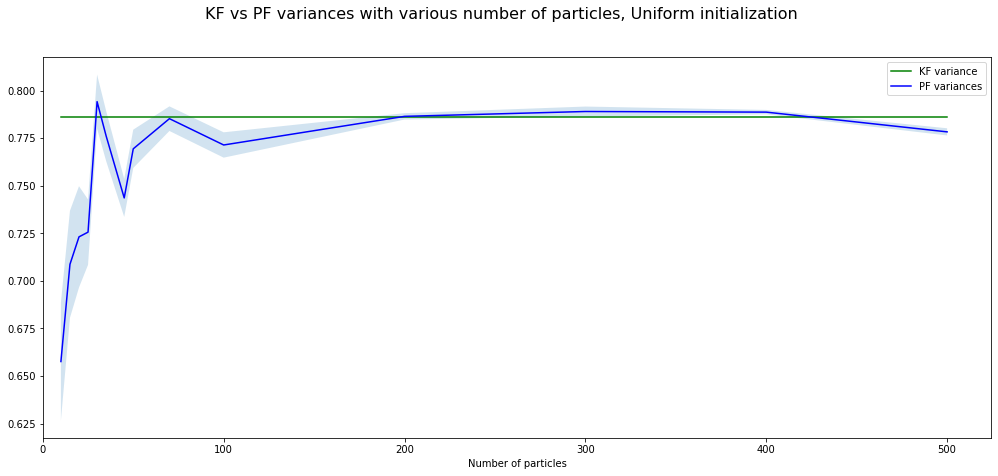

In [31]:
kf1x = Kalman(model1, print_results=False)
kf_means, kf_vars = kf1x.run(time)
kf_var = np.mean(kf_variances[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Uniform initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

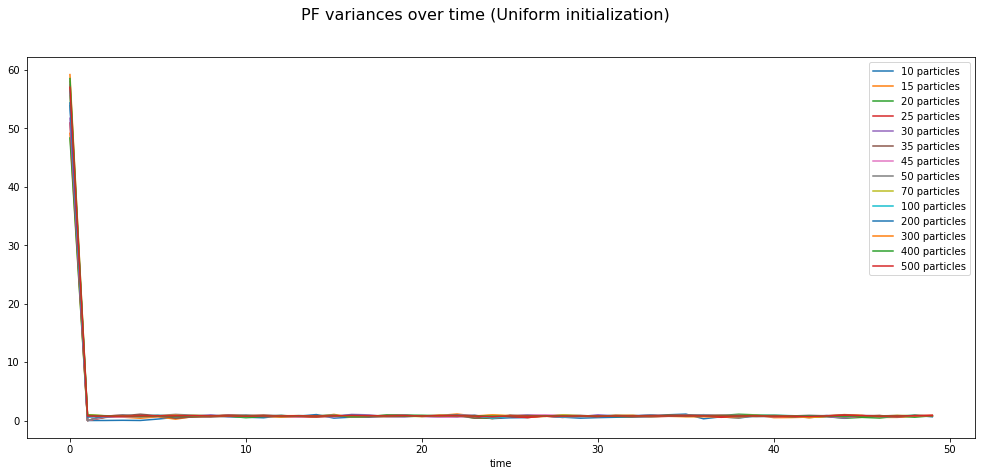

In [35]:
variances = res[:, 0]
times = range(time)
fig = plt.figure()
fig.suptitle("PF variances over time (Uniform initialization)", fontsize=16)
ax = fig.add_subplot(111)
for nr in range(len(particles_to_test)):
    ax.plot(times, variances[nr], label=str(particles_to_test[nr])+" particles")
ax.legend()
ax.set_xlabel("time")
plt.show()

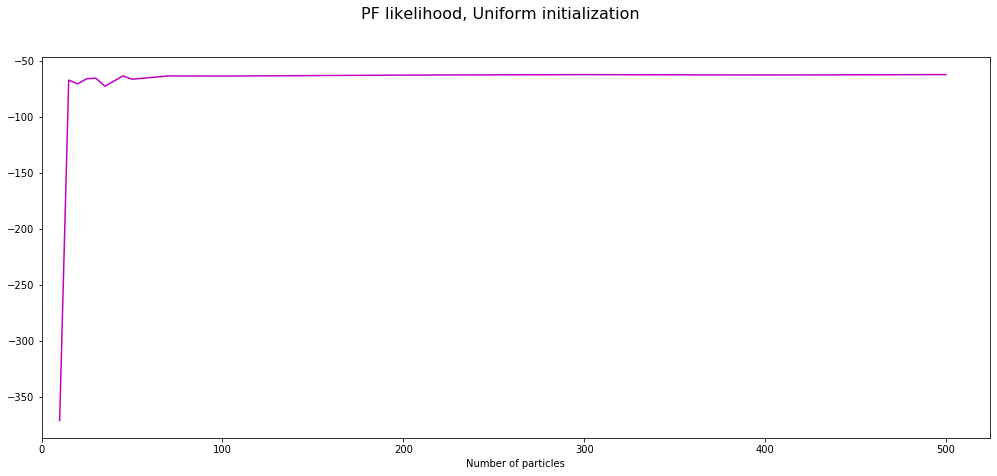

In [36]:
times = range(len(particles_to_test))
pf_likelihoods = res[:, 3]
fig = plt.figure()
fig.suptitle("PF likelihood, Uniform initialization", fontsize=16)
ax = fig.add_subplot(111)
ax.plot(particles_to_test, pf_likelihoods, 'm')
ax.set_xlabel("Number of particles")
ax.set_xlim(left=0)
plt.show()

# Simple 2D example

In [37]:
x_0 = np.array([0., 0.])
F = np.array([[1., 1.], [0., 1.]])
H = np.array([[1., 0.], [0., 1.]])
Q = np.array([[1., 0.], [0., 1.]])
R = np.array([[20., 0.], [0., 5.]])

model2 = SimpleModel(x_0, F, H, Q, R)

In [42]:
pf2 = ParticleFilter(model2, N=500, resampling_algo='simple_resample', x_0=model2.states[0])

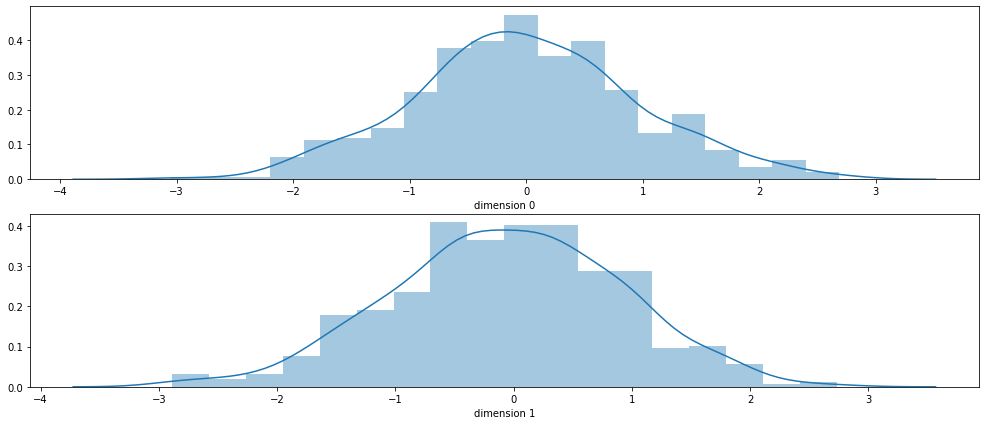

In [43]:
pf2.plot_particles()

Running PF with 500 particles: ....R..R...R...R.R..R..R..R...R..R...R..R..R..R.. end
Marginal likelihood:  -239.1238


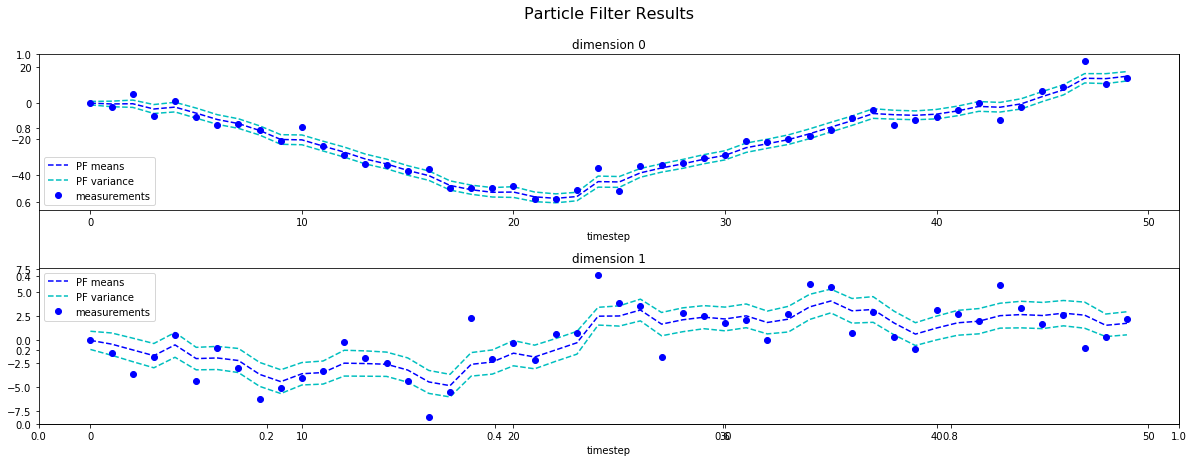

In [44]:
pf_means, pf_vars, pf_likelihood = pf2.run(50)

Loglikelihood:  -270.2771149477495


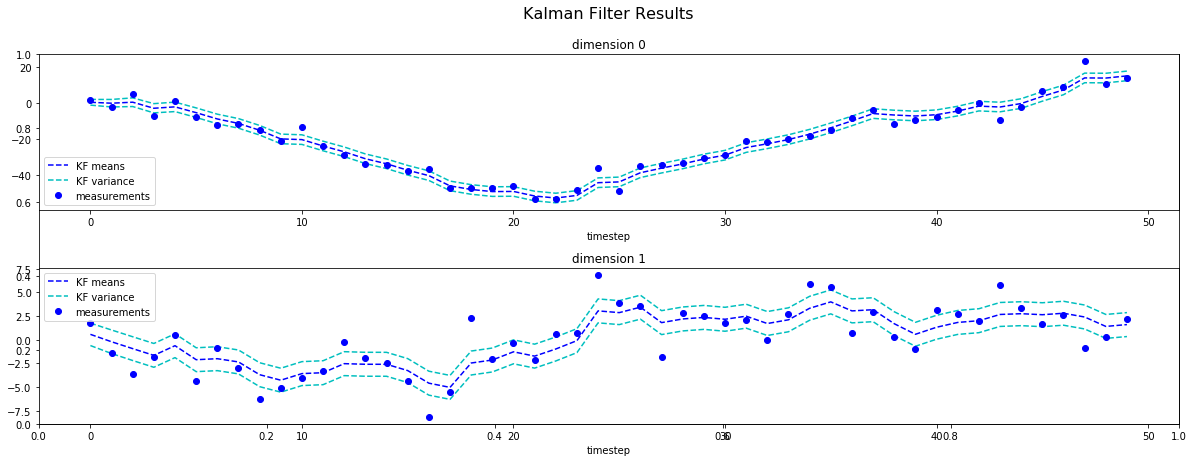

In [45]:
kf2 = Kalman(model2, print_results=True)
kf_means, kf_variances = kf2.run(time)

# Simple stochastic example

In [83]:
x_0 = 100
b1 = 0.01
K1 = 1000
birth = Event(
    rate_calculator=lambda x: max(0, b1 * (1 - float(x)/K1)),
    change_function=lambda x: 2 * x
    )

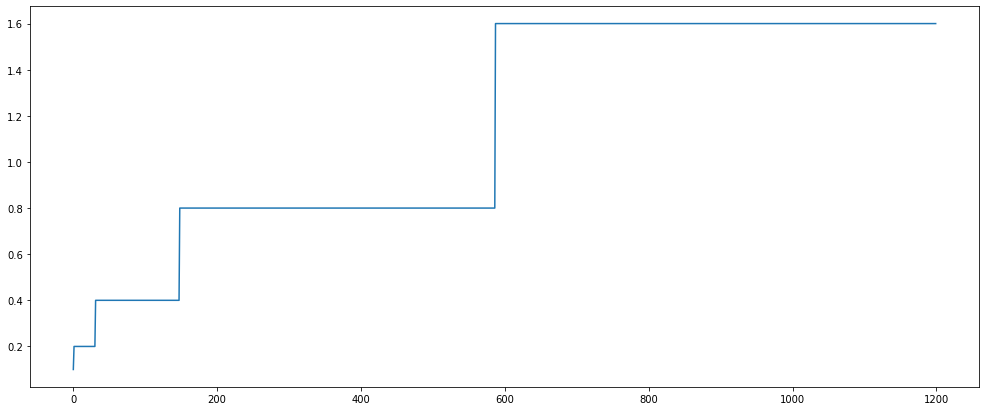

In [84]:
model3 = StochasticModelTauLeaping(x_0, events=[birth], step_size=1)

times = range(1200)
states = [model3.measure(t) for t in times]
plt.plot(times, [st/K1 for st in states])

In [85]:
birth2 = Event(
    rate_calculator=lambda x: 1,
    change_function=lambda x: x + x * b1 * (1 - float(x)/K1)
    )

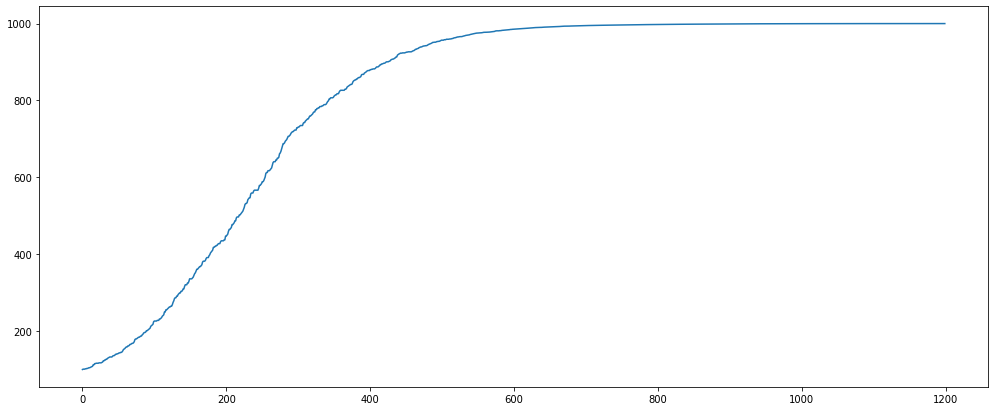

In [86]:
model4 = StochasticModelTauLeaping(x_0, events=[birth2], step_size=1)

times = range(1200)
states = [model4.measure(t) for t in times]
plt.plot(times, states)